__GLE_tutorial__ produces __3 GLE related plots__. 

It makes use of the script by __C.T. Steigies__ (*nest.py*) to call NMDB and download data from the selected stations

*In particular it provides*:

__First plot__

A percentage increase plot of the slected stations. In order to make the percentage a baseline (taken simply as the 1 hour, i.e. the first 60 minutes from the selected interval).

__Second plot__
This script provides the __North-South latitudinal anisotropy__

Similar as before, in order to make the percentage a baseline (taken simply as the 1 hour, i.e. the first 60 minutes from the selected interval).

Makes a plot of two stations including their difference (the idea here is to directly evaluate the __North-South latitudinal anisotropy__. For this THULE and JBGO (or MCMU for earlier GLEs) should be selected, see also https://www.aanda.org/articles/aa/full_html/2022/04/aa42855-21/F10.html for an example) | *however data seem not to be available*.

__Third plot__
This script provides the __Longitudinal anisotropy__

Similar as before, in order to make the percentage a baseline (taken simply as the 1 hour, i.e. the first 60 minutes from the selected interval).

Makes a sum of all selected stations except the first one and then provides the difference between the first one and the rest NMs. The idea is to have all NM stations with a nominal cut-off R< 1.4 GV in order to evaluate the __longitudinal anisotropy__ see also https://www.aanda.org/articles/aa/full_html/2022/04/aa42855-21/F11.html for an example) | *however data seem not to be available*. 
    
*Athanasios Papaioannou* <atpapaio@noa.gr>, *George Vasalos* <gvasalos@noa.gr>


In [64]:
import datetime as dt
import pandas as pd
import numpy as np
import nest

start = dt.datetime(2021, 10, 28, 15,0, 0)
end = dt.datetime(2021, 10, 28, 20, 50, 0)
table = "revori" 

This is the **first plot**. It provides a *percentage increase (%)* of each station, assuming a **baseline of 60 min** (i.e. 60 1-min measurements) from the start of the file.

In [106]:
# for the first plot | simple increase plot of the selected NM stations

station = sorted(["domc", "sopo","fsmt"])

names = station.copy()
data = "e"
        
download=nest.multi(station, table, data, start, end)
        
print(download)
        
names.insert(0, "start_date_time")
        
df = pd.read_table(download, skiprows=1, sep=";", comment="#", header=0, names=names)
df.index = pd.to_datetime(df.start_date_time.astype(str))
df.drop(['start_date_time'], axis=1, inplace=True) # drop obsolete start_date_time column"

https://www.nmdb.eu/nest/draw_graph.php?wget=1&stations[]=DOMC&stations[]=FSMT&stations[]=SOPO&output=ascii&tabchoice=revori&odtype[]=corr_for_efficiency&date_choice=bydate&start_year=2021&start_month=10&start_day=28&start_hour=15&start_min=00&end_year=2021&end_month=10&end_day=28&end_hour=20&end_min=50&yunits=0


<AxesSubplot: xlabel='start_date_time'>

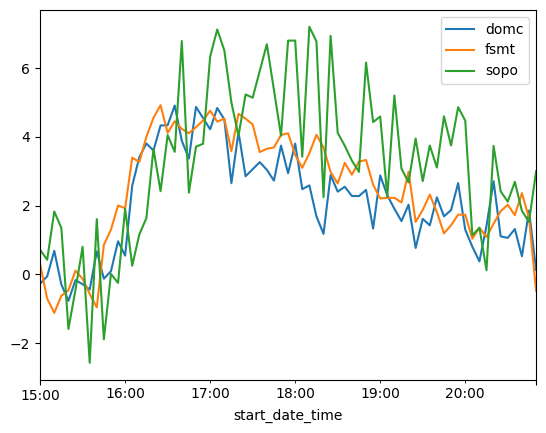

In [109]:
#Make a copy of the initial data
increase = df.copy()

#make baseline   
sbas = increase.head(60) # take the first 60 minutes of the start-end time block
    
for s in station:
    increase[s] = ((increase[s] - sbas[s].mean())/sbas[s].mean())*100  
    
#print(list(increase))
#print(increase.head(60))

# Make a 5-min averaging of the initial 1-min data
increase = increase.resample('5T').mean()

# Make the plot of the GLE perecentage increase (%)
increase.plot() 

This is the **second plot** | **N-S (latitudinal) anisotropy**
Thule (THUL) and Jang Bogo (JBGO) NMs are looking towards the north and the south
For past GLEs one needs to search for Thule (THUL) and Korean McMurdo (MCMU)

<AxesSubplot: xlabel='start_date_time'>

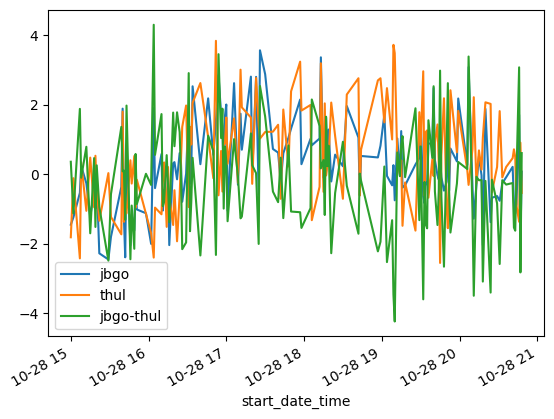

In [101]:
# for the second plot | N-S (latitudinal) anisotropy
# here we need to download other stations than those for the first plot

station = sorted(["thul", "jbgo"]) 

names = station.copy()
data = "e"
        
download=nest.multi(station, table, data, start, end)
              
names.insert(0, "start_date_time")
        
df = pd.read_table(download, skiprows=1, sep=";", comment="#", header=0, names=names)
df.index = pd.to_datetime(df.start_date_time.astype(str))
df.drop(['start_date_time'], axis=1, inplace=True) # drop obsolete start_date_time column"

#Make a copy of the initial data
anisolat = df.copy()

#Here we exclude the Null values of the arrays
anisolat = anisolat.replace(r' +null',np.nan,regex=True) # the 'null' in the file is not recognized as null, thus we first replace

anisolat = anisolat.dropna() # here we drop the replaced rows of data with nan 

#convert to numeric
for s in station:
    anisolat[s] = pd.to_numeric(anisolat[s],downcast="float")
    
#make baseline
sbas = anisolat.head(60) # take the first 60 minutes of the start-end time block

for s in station:
    anisolat[s] = ((anisolat[s] - sbas[s].mean())/sbas[s].mean())*100  
    
    
# create a difference between the selected stations North-South anisotropy - Latitudinal anisotropy
anisolat[f"{station[0]}-{station[1]}"] = anisolat[station[0]] - anisolat[station[1]]
     

# Make the plot of the GLE perecentage increase (%)
anisolat.plot() 

This is the **third plot** | **Longitudinal anisotropy** 

All high-latitude NMs situated near sea level have approximately the same dependence on the count rate of the energy of 
primary CRs. They should display almost the same increases caused by solar CRs, if the effect is an isotropic one.
Thus provide a clear indication of the longitudinal anisotropy.

the first station in the selection is the one station to compare against the mean of all others
select stations with nominal vertical geomagnetic cut-off rigidity Rc<1.4 GV: Apatity (APTY), 
Fort Smith (FSMT), Inuvik (INVK), Kerguelen (KERG), Mawson (MWSN), Nain (NAIN), Oulu (OULU), 
Peawanuck (PWNK), Terre Adelie (TERA), Thule (THUL), and Tixie Bay (TXBY),

https://www.nmdb.eu/nest/draw_graph.php?wget=1&stations[]=FSMT&stations[]=APTY&stations[]=OULU&stations[]=INVK&stations[]=KERG&stations[]=NAIN&stations[]=PWNK&stations[]=TERA&stations[]=THUL&stations[]=TXBY&output=ascii&tabchoice=revori&odtype[]=corr_for_efficiency&date_choice=bydate&start_year=2021&start_month=10&start_day=28&start_hour=15&start_min=00&end_year=2021&end_month=10&end_day=28&end_hour=20&end_min=50&yunits=0


<AxesSubplot: xlabel='start_date_time'>

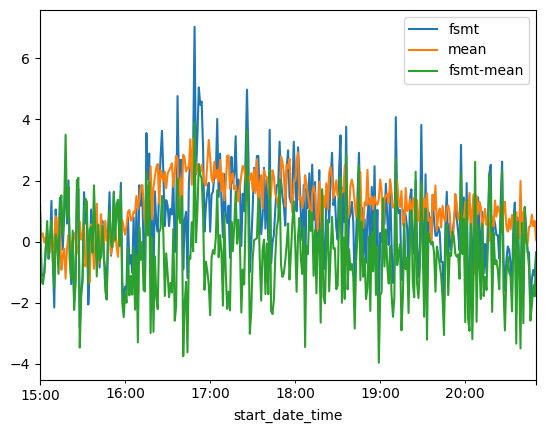

In [102]:
# for the third plot | Longitudinal anisotropy 

station = ["fsmt", "apty", "oulu", "invk", "kerg", "nain", "pwnk", "tera", "thul", "txby"]

names = station.copy()
data = "e"
        
download=nest.multi(station, table, data, start, end)
print(download)

names.insert(0, "start_date_time")
        
df = pd.read_table(download, skiprows=1, sep=";", comment="#", header=0, names=names)
df.index = pd.to_datetime(df.start_date_time.astype(str))
df.drop(['start_date_time'], axis=1, inplace=True) # drop obsolete start_date_time column"

#Make a copy of the initial data
anisolon = df.copy()

#Here we exclude the Null values of the arrays
anisolon = anisolon.replace(r' +null',np.nan,regex=True) # the 'null' in the file is not recognized as null, thus we first replace

anisolon = anisolon.dropna() # here we drop the replaced rows of data with nan 


#convert to numeric
for s in station:
    anisolon[s] = pd.to_numeric(anisolon[s],downcast="float")


#make baseline   
sbas = anisolon.head(60) # take the first 60 minutes of the start-end time block
 
    
for s in station:
    anisolon[s] = ((anisolon[s] - sbas[s].mean())/sbas[s].mean())*100  
       

# make a sum of the R<1 GV - longitudinal anisotropy
means = []
for _, row in anisolon.iterrows():
    rsum = 0
    for s in station[1:]:
        rsum += row[s]
    means.append(rsum/(len(station)-1))
anisolon["mean"] = means
anisolon[f"{station[0]}-mean"] = anisolon[station[0]] - anisolon["mean"]
     
# Make the plot of the GLE perecentage increase (%)
anisolon.plot(y=['fsmt','mean','fsmt-mean'])     

In [103]:
print('End')

End
